In [26]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

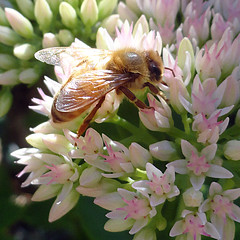

In [2]:
path = './data/data/train/bee'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [3]:
img = load_img(fullname, target_size=(150, 150))

In [4]:
x = np.array(img)
x.shape

(150, 150, 3)

In [18]:
model = tf.keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [31]:
opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11215873 (42.79 MB)
Trainable params: 11215873 (42.79 MB)
Non-trainable params: 0 (0.00 Byte)
____________

Question 1

binary crossentropy

Question 2

In [25]:
896

896

In [38]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    './data/data/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='binary'
)

Found 3678 images belonging to 2 classes.


In [39]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [40]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    './data/data/test',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
    class_mode='binary'
)

Found 918 images belonging to 2 classes.


In [41]:
val_ds.class_indices

{'bee': 0, 'wasp': 1}

In [42]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
115/115 [==============================] - 82s 714ms/step - loss: 0.6937 - accuracy: 0.5318 - val_loss: 0.6756 - val_accuracy: 0.5370
Epoch 2/10
115/115 [==============================] - 45s 387ms/step - loss: 0.6743 - accuracy: 0.5680 - val_loss: 0.6766 - val_accuracy: 0.5370
Epoch 3/10
115/115 [==============================] - 51s 439ms/step - loss: 0.6615 - accuracy: 0.5818 - val_loss: 0.6263 - val_accuracy: 0.6492
Epoch 4/10
115/115 [==============================] - 55s 473ms/step - loss: 0.6388 - accuracy: 0.6281 - val_loss: 0.6090 - val_accuracy: 0.6634
Epoch 5/10
115/115 [==============================] - 64s 555ms/step - loss: 0.6171 - accuracy: 0.6523 - val_loss: 0.5930 - val_accuracy: 0.6830
Epoch 6/10
115/115 [==============================] - 58s 507ms/step - loss: 0.6012 - accuracy: 0.6732 - val_loss: 0.5855 - val_accuracy: 0.6972
Epoch 7/10
115/115 [==============================] - 59s 510ms/step - loss: 0.5717 - accuracy: 0.7094 - val_loss: 0.5718 - val_ac

In [57]:
history.history

{'loss': [0.6937148571014404,
  0.6743409633636475,
  0.6614716649055481,
  0.6387708187103271,
  0.6171367764472961,
  0.6011640429496765,
  0.571707010269165,
  0.5541673302650452,
  0.5363495349884033,
  0.5152283310890198],
 'accuracy': [0.5318107604980469,
  0.5679717063903809,
  0.5818379521369934,
  0.6280587315559387,
  0.6522566676139832,
  0.6731919646263123,
  0.7093529105186462,
  0.7109842300415039,
  0.734910249710083,
  0.7501359581947327],
 'val_loss': [0.6756211519241333,
  0.6766334176063538,
  0.6263300180435181,
  0.6090235114097595,
  0.5930457711219788,
  0.5855047106742859,
  0.5718249678611755,
  0.5669622421264648,
  0.5985973477363586,
  0.5466165542602539],
 'val_accuracy': [0.5370370149612427,
  0.5370370149612427,
  0.6492374539375305,
  0.6633986830711365,
  0.6830065250396729,
  0.6971677541732788,
  0.7124183177947998,
  0.7287581562995911,
  0.6677560210227966,
  0.7396514415740967]}

Question 3

In [52]:
np.median(history.history['accuracy'])

0.6627243161201477

Question 4

In [59]:
np.std(history.history['loss'])

0.05797801866963422

In [62]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_ds = train_gen.flow_from_directory(
    './data/data/train',
    target_size=(150, 150),
    batch_size=32,
    shuffle=True,
    class_mode='binary'
)

Found 3678 images belonging to 2 classes.


In [63]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
115/115 [==============================] - 95s 826ms/step - loss: 0.5449 - accuracy: 0.7262 - val_loss: 0.5311 - val_accuracy: 0.7560
Epoch 2/10
115/115 [==============================] - 55s 477ms/step - loss: 0.5308 - accuracy: 0.7439 - val_loss: 0.5167 - val_accuracy: 0.7505
Epoch 3/10
115/115 [==============================] - 54s 469ms/step - loss: 0.5224 - accuracy: 0.7466 - val_loss: 0.5842 - val_accuracy: 0.7168
Epoch 4/10
115/115 [==============================] - 56s 489ms/step - loss: 0.5219 - accuracy: 0.7512 - val_loss: 0.5069 - val_accuracy: 0.7810
Epoch 5/10
115/115 [==============================] - 54s 468ms/step - loss: 0.5174 - accuracy: 0.7531 - val_loss: 0.5266 - val_accuracy: 0.7451
Epoch 6/10
115/115 [==============================] - 55s 477ms/step - loss: 0.5035 - accuracy: 0.7711 - val_loss: 0.5077 - val_accuracy: 0.7614
Epoch 7/10
115/115 [==============================] - 55s 477ms/step - loss: 0.5027 - accuracy: 0.7686 - val_loss: 0.4928 - val_ac

In [64]:
history.history

{'loss': [0.5449071526527405,
  0.5308002233505249,
  0.5223608613014221,
  0.5219067931175232,
  0.5173532366752625,
  0.5034873485565186,
  0.5026931762695312,
  0.4987533688545227,
  0.48778441548347473,
  0.49425238370895386],
 'accuracy': [0.7262098789215088,
  0.7438825368881226,
  0.746601402759552,
  0.7512235045433044,
  0.7531266808509827,
  0.7710712552070618,
  0.7686242461204529,
  0.7607395052909851,
  0.7735182046890259,
  0.7743338942527771],
 'val_loss': [0.5311364531517029,
  0.5167447328567505,
  0.5842143297195435,
  0.5069407820701599,
  0.5266438722610474,
  0.5077083110809326,
  0.49284371733665466,
  0.49568814039230347,
  0.491790771484375,
  0.5006192922592163],
 'val_accuracy': [0.7559912800788879,
  0.7505446672439575,
  0.7167755961418152,
  0.7810457348823547,
  0.7450980544090271,
  0.7614378929138184,
  0.7647058963775635,
  0.7657952308654785,
  0.7930282950401306,
  0.7483659982681274]}

Question 5

In [68]:
np.mean(history.history['val_loss'])

0.5154330402612686

Question 6

In [74]:
np.mean(history.history['val_accuracy'][5:])

0.7666666626930236